In [1]:
%matplotlib inline

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import random

from matplotlib import animation, rc
from IPython.display import HTML

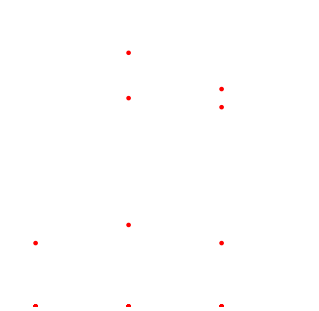

In [3]:
IMAGE_WIDTH = 100
IMAGE_HEIGHT = 100
PUNTOS_EMISION = [(10,90),(40,90),(70,90)]
VELOCIDAD = 3
PROBABILIDAD_EMISION = 0.1

fig = plt.figure()
plt.axis('off')
fig.set_dpi(10)
fig.set_size_inches(40, 40)

ax = plt.axes(xlim=(0, IMAGE_WIDTH), ylim=(0, IMAGE_HEIGHT))
ax.set_axis_off()

particulas = []
trayectorias_puntos = {}
id_punto = 1

def init():
    global id_punto
    for punto_emision in PUNTOS_EMISION:
        particula_inicial =  plt.Circle(punto_emision, 0.75, fc='r')
        particula_inicial.id = id_punto
        id_punto += 1
        particulas.append(particula_inicial)
        ax.add_patch(particula_inicial)
    return particulas


def animate(i):
    global id_punto
    global particulas
    #GUARDAR_ESTADO:
    for particula in particulas:
        if particula.id not in trayectorias_puntos:
            trayectorias_puntos[particula.id] = []
        trayectorias_puntos[particula.id].append([particula.center[0], particula.center[1]])
    # EMITIR
    for punto_emision in PUNTOS_EMISION:
        sorteo = random.random()
        if sorteo < PROBABILIDAD_EMISION:
            nuevo_punto =  plt.Circle(punto_emision, 0.75, fc='r')
            nuevo_punto.id = id_punto
            id_punto += 1
            nuevo_punto.center = punto_emision
            particulas.append(nuevo_punto)
            ax.add_patch(nuevo_punto)
    # MOVER
    for particula in particulas:
        particula.center = (particula.center[0], particula.center[1]-VELOCIDAD)
    # BORRAR
    particulas = [p for p in particulas if p.center[1] > 0]
    return particulas

anim = animation.FuncAnimation(fig, animate, 
                               init_func=init,
                               frames=100,
                               interval=100,
                               blit=True)

HTML(anim.to_html5_video())


<IPython.core.display.Javascript object>


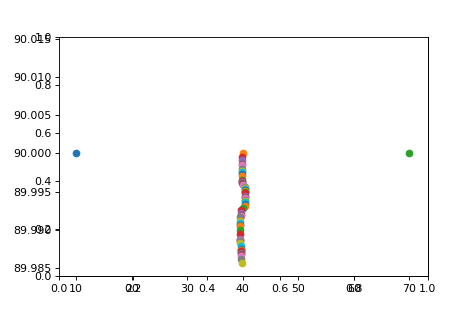

In [7]:
%matplotlib notebook
trayectoria_buscada =[]

import numpy as np
import matplotlib.pyplot as plt
import matplotlib 

fig = plt.figure()

ax = plt.axes(xlim=(0, IMAGE_WIDTH), ylim=(0, IMAGE_HEIGHT))
ax.clear()
ax = fig.add_subplot(111)
for punto_emision in PUNTOS_EMISION:
    ax.scatter(punto_emision[0],punto_emision[1])
text=ax.text(0,0, "", va="bottom", ha="left")

def onclick(event):
    if event.button:
        trayectoria_buscada.append([event.xdata,event.ydata])
        ax.scatter(event.xdata,event.ydata)
        tx = 'button=%d, x=%d, y=%d, xdata=%f, ydata=%f' % (event.button, event.x, event.y, event.xdata, event.ydata)
        text.set_text(tx)

cid = fig.canvas.mpl_connect('motion_notify_event', onclick)

In [8]:
print trayectoria_buscada
print trayectorias_puntos

[[39.92907431525784, 89.99950093492309], [39.92907431525784, 89.99908215455771], [39.92907431525784, 89.99866337419232], [39.92907431525784, 89.99852378073719], [39.92907431525784, 89.99796540691668], [39.92907431525784, 89.99768622000643], [39.92907431525784, 89.9975466265513], [39.92907431525784, 89.99726743964105], [39.92907431525784, 89.99698825273079], [39.92907431525784, 89.99656947236541], [39.92907431525784, 89.99642987891028], [39.92907431525784, 89.99629028545515], [39.92907431525784, 89.99615069200001], [40.12720819971545, 89.99587150508977], [40.32534208417305, 89.9955923181795], [40.32534208417305, 89.99545272472439], [40.32534208417305, 89.99531313126926], [40.32534208417305, 89.99517353781413], [40.32534208417305, 89.995033944359], [40.32534208417305, 89.99489435090388], [40.32534208417305, 89.99475475744875], [40.32534208417305, 89.99447557053848], [40.32534208417305, 89.99433597708335], [40.32534208417305, 89.99419638362824], [40.32534208417305, 89.99391719671797], [40

In [40]:
from tslearn.preprocessing import TimeSeriesScalerMeanVariance, TimeSeriesResampler
from tslearn.clustering import TimeSeriesKMeans

trayectorias = [t for t in trayectorias_puntos.values() if len(t) > 1]

SIZE_SERIE = 100
X = TimeSeriesResampler(sz=SIZE_SERIE).fit_transform(trayectorias)
print(X.shape)
print("{} puntos, {} frames con {} puntos cada uno".format(X.shape[0],X.shape[1],X.shape[2]))


knn = KNeighborsTimeSeries(n_neighbors=3, metric="dtw")
print(X_train.shape)
knn.fit(X)
knn.radius_neighbors()


(24, 100, 2)
24 puntos, 100 frames con 2 puntos cada uno
(20, 100, 3)


NotFittedError: Must fit neighbors before querying.

In [31]:
import numpy as np
samples = [[0., 0., 0.], [0., .5, 0.], [1., 1., .5]]
from sklearn.neighbors import NearestNeighbors
neigh = NearestNeighbors(radius=1.6)
neigh.fit(X) 
#NearestNeighbors(algorithm='auto', leaf_size=30, ...)
rng = neigh.radius_neighbors([[1., 1., 1.]])
print(np.asarray(rng[0][0])) 
#[ 1.5  0.5]
print(np.asarray(rng[1][0])) 
#[1 2]


ValueError: Found array with dim 3. Estimator expected <= 2.

In [36]:
from __future__ import print_function
import numpy
from sklearn.metrics import accuracy_score
from sklearn.pipeline import Pipeline

from tslearn.generators import random_walk_blobs
from tslearn.preprocessing import TimeSeriesScalerMinMax
from tslearn.neighbors import KNeighborsTimeSeriesClassifier, KNeighborsTimeSeries
from tslearn.piecewise import SymbolicAggregateApproximation

numpy.random.seed(0)
n_ts_per_blob, sz, d, n_blobs = 20, 100, 3, 2

# Prepare data
X, y = random_walk_blobs(n_ts_per_blob=n_ts_per_blob, sz=sz, d=d, n_blobs=n_blobs)
scaler = TimeSeriesScalerMinMax(min=0., max=1.)  # Rescale time series
X_scaled = scaler.fit_transform(X)

indices_shuffle = numpy.random.permutation(n_ts_per_blob * n_blobs)
X_shuffle = X_scaled[indices_shuffle]
y_shuffle = y[indices_shuffle]

X_train = X_shuffle[:n_ts_per_blob * n_blobs // 2]
X_test = X_shuffle[n_ts_per_blob * n_blobs // 2:]
y_train = y_shuffle[:n_ts_per_blob * n_blobs // 2]
y_test = y_shuffle[n_ts_per_blob * n_blobs // 2:]

# Nearest neighbor search
knn = KNeighborsTimeSeries(n_neighbors=3, metric="dtw")
print(X_train.shape)
knn.fit(X_train, y_train)
dists, ind = knn.kneighbors(X_test)
print("1. Nearest neighbour search")
print("Computed nearest neighbor indices (wrt DTW)\n", ind)
print("First nearest neighbor class:", y_test[ind[:, 0]])

# Nearest neighbor classification
knn_clf = KNeighborsTimeSeriesClassifier(n_neighbors=3, metric="dtw")
knn_clf.fit(X_train, y_train)
predicted_labels = knn_clf.predict(X_test)
print("\n2. Nearest neighbor classification using DTW")
print("Correct classification rate:", accuracy_score(y_test, predicted_labels))

# Nearest neighbor classification with a different metric (Euclidean distance)
knn_clf = KNeighborsTimeSeriesClassifier(n_neighbors=3, metric="euclidean")
knn_clf.fit(X_train, y_train)
predicted_labels = knn_clf.predict(X_test)
print("\n3. Nearest neighbor classification using L2")
print("Correct classification rate:", accuracy_score(y_test, predicted_labels))

# Nearest neighbor classification  based on SAX representation
sax_trans = SymbolicAggregateApproximation(n_segments=10, alphabet_size_avg=5)
knn_clf = KNeighborsTimeSeriesClassifier(n_neighbors=3, metric="euclidean")
pipeline_model = Pipeline(steps=[('sax', sax_trans), ('knn', knn_clf)])
pipeline_model.fit(X_train, y_train)
predicted_labels = pipeline_model.predict(X_test)
print("\n4. Nearest neighbor classification using SAX+MINDIST")
print("Correct classification rate:", accuracy_score(y_test, predicted_labels))

(20, 100, 3)
1. Nearest neighbour search
Computed nearest neighbor indices (wrt DTW)
 [[ 9 13  8]
 [11 12  4]
 [ 8 10  9]
 [11  4  1]
 [ 9 10  5]
 [ 6  1 19]
 [13  2  5]
 [ 1 11  4]
 [11  7  1]
 [ 0 13 14]
 [12 11 16]
 [14  2  5]
 [13  2 10]
 [13  2  0]
 [ 2 13  0]
 [10 13  9]
 [ 9 13  2]
 [ 6 19 12]
 [13  2  0]
 [ 4 17 12]]
First nearest neighbor class: [0 0 1 0 0 0 0 1 0 0 0 0 0 0 0 1 0 0 0 0]

2. Nearest neighbor classification using DTW
Correct classification rate: 1.0


ValueError: Unrecognized time series metric string: euclidean (should be 'dtw')